### Puxar base de dados

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Informações Gerais

In [61]:

tabela = pd.read_csv("exportacoes_franca.csv")
tabela = tabela.loc[tabela["Economic Block"] == "Europe", :]
display(tabela)
cidade_qtds = tabela['City'].value_counts()
produto_qtds = tabela['SH2 Description'].value_counts()
print(cidade_qtds)
print(produto_qtds)

exportation_year = tabela.groupby("Year",).sum()
exportation_year = exportation_year[["US$ FOB"]]


,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
6,2016,1,France,Alta Floresta - MT,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,47828,28306
8,2016,1,France,Ananindeua - PA,1211,Plants and parts of plants (including seeds an...,12,"Oil seeds and oleaginous fruits; Grains, Seeds...",Europe,391,22
...,...,...,...,...,...,...,...,...,...,...,...
142350,2020,12,France,Vinhedo - SP,4016,Other articles of vulcanised rubber other than...,40,Rubber and articles thereof,Europe,136,0
142352,2020,12,France,Vinhedo - SP,6806,"Slag wool, rock wool and similar mineral wools...",68,"Articles of stone, plaster, cement, asbestos, ...",Europe,76,50
142354,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",Europe,2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400


São Paulo - SP              4317
Sorocaba - SP               4276
Taubaté - SP                3906
São José dos Campos - SP    3268
Jundiaí - SP                2618
                            ... 
Cabedelo - PB                  1
São Lourenço - MG              1
Lambari - MG                   1
Pintadas - BA                  1
Passa Tempo - MG               1
Name: City, Length: 972, dtype: int64
Nuclear reactors, boilers, machinery and mechanical appliances; others                  9866
Electrical machinery and equipment and parts thereof; others                            8089
Optical, photographic, cinematographic instruments; others                              4074
Articles of iron or steel                                                               4051
Wood and articles of wood; wood charcoal                                                3819
                                                                                        ... 
Vegetable plaiting materials; Vegetable p

C:\Users\Fábio\AppData\Local\Temp\ipykernel_21716\3341668298.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exportation_year = tabela.groupby("Year",).sum()


### Como foi a evolução das exportações para a frança ao longo dos anos?

,US$ FOB
Year,
2016,"$2,307,750,041.00"
2017,"$2,224,352,728.00"
2018,"$2,619,712,208.00"
2019,"$2,609,361,806.00"
2020,"$1,983,797,405.00"


<Axes: xlabel='Year', ylabel='US$ FOB'>

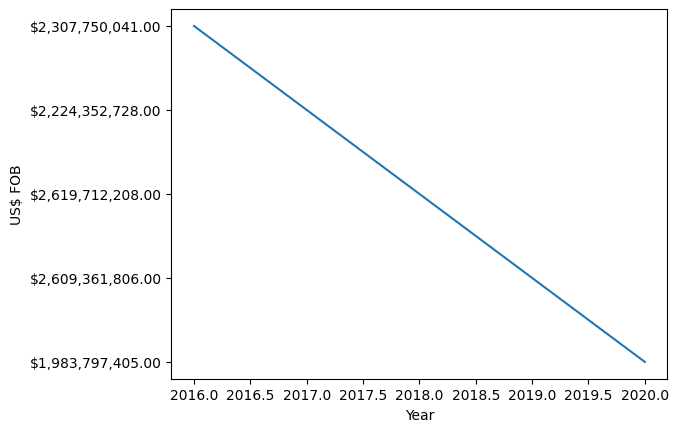

In [62]:
#criar funcao de formataçao
def formatar (valor):
    return f"${valor:,.2f}"

#aplicar a formatação
exportation_year["US$ FOB"] = exportation_year["US$ FOB"].map(formatar)
display(exportation_year)
sns.lineplot(data=exportation_year,y="US$ FOB", x="Year")

### Quais os produtos mais exportados ao longo de todo o período?

In [63]:
exportation_produto = tabela.groupby("SH4 Description",).sum()
exportation_produto = exportation_produto[["US$ FOB"]]
exportation_produto = exportation_produto.sort_values('US$ FOB', ascending=False)
exportation_produto["US$ FOB"] = exportation_produto["US$ FOB"].map(formatar)

display(exportation_produto)

C:\Users\Fábio\AppData\Local\Temp\ipykernel_21716\1322099359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exportation_produto = tabela.groupby("SH4 Description",).sum()


,US$ FOB
SH4 Description,
"Soybean oilcake and other solid residue, wh/not ground","$2,814,212,320.00"
"Iron ores and concentrates, including roasted iron pyrites","$1,632,140,244.00"
"Chemical wood pulp, soda or sulphate, other than dissolving grades","$922,712,342.00"
"Coffee, whether or not roasted or decaffeinated; coffee husks and skins; coffee substitutes containing coffee in any proportion","$536,277,376.00"
"Other aircraft (for example, helicopters, aeroplanes); spacecraft (including satellites) and suborbital and spacecraft launch vehicles","$342,566,535.00"
...,...
Anti-freezing preparations and prepared de-icing fluids,$5.00
"Man-made filament yarn (other than sewing thread), put up for retail sale",$5.00
"Glass envelopes (including bulbs and tubes), open, and glass parts thereof, without fittings, for electric lamps, cathode-ray tubes or the like",$4.00


### Em 2020 qual cidade mais exportou para a França?

In [73]:
tabela_2020 = tabela.loc[tabela["Year"] == 2020, :]
exportation_cidade = tabela_2020.groupby("City",).sum()[["US$ FOB"]]

exportation_cidade = exportation_cidade.sort_values('US$ FOB', ascending=False)
exportation_cidade["US$ FOB"] = exportation_cidade["US$ FOB"].map(formatar)

display(exportation_cidade)

C:\Users\Fábio\AppData\Local\Temp\ipykernel_21716\2907870565.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exportation_cidade = tabela_2020.groupby("City",).sum()[["US$ FOB"]]


,US$ FOB
City,
Duque de Caxias - RJ,"$139,702,798.00"
Luís Eduardo Magalhães - BA,"$132,664,066.00"
Ponta Grossa - PR,"$93,888,508.00"
São José dos Campos - SP,"$86,469,638.00"
Rio de Janeiro - RJ,"$61,261,107.00"
...,...
Não-Me-Toque - RS,$21.00
Cubatão - SP,$20.00
Holambra - SP,$5.00


### O que as 2 maiores cidades exportaram tanto?

In [77]:
#Duque de Caxias - RS
tabela_cidade = tabela_2020.loc[tabela_2020["City"] == "Duque de Caxias - RJ", :]
tabela_cidade = tabela_cidade.groupby("SH4 Description",).sum()[["US$ FOB"]]
tabela_cidade = tabela_cidade.sort_values('US$ FOB', ascending=False)
tabela_cidade["US$ FOB"] = tabela_cidade["US$ FOB"].map(formatar)
display(tabela_cidade)

#Luís Eduardo Magalhães - BA
tabela_cidade = tabela_2020.loc[tabela_2020["City"] == "Luís Eduardo Magalhães - BA", :]
tabela_cidade = tabela_cidade.groupby("SH4 Description",).sum()[["US$ FOB"]]
tabela_cidade = tabela_cidade.sort_values('US$ FOB', ascending=False)
tabela_cidade["US$ FOB"] = tabela_cidade["US$ FOB"].map(formatar)
display(tabela_cidade)

C:\Users\Fábio\AppData\Local\Temp\ipykernel_21716\896226992.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabela_cidade = tabela_cidade.groupby("SH4 Description",).sum()[["US$ FOB"]]


,US$ FOB
SH4 Description,
"Turbo-jets, turbo-propellers and other gas turbines","$82,490,516.00"
Crude oil from petroleum and bituminous minerals,"$33,610,511.00"
"Transmission shafts (including cam shafts and crank shafts) and cranks; bearing housings and plain shaft bearings; gears and gearing; ball or roller screws; gear boxes and other speed changers, including torque converters; flywheels and pulleys, including","$4,897,696.00"
Ball or roller bearings,"$4,123,545.00"
"Screws, bolts, nuts, coach screws, screw hooks, rivets, cotters, cotter-pins, washers (including spring washers) and similar articles, of iron or steel","$2,109,423.00"
"Soybean oilcake and other solid residue, wh/not ground","$2,007,137.00"
Other articles of nickel,"$1,475,623.00"
Other articles of iron or steel,"$1,423,564.00"
"Taps, cocks, valves and similar appliances for pipes, boiler shells, tanks, vats or the like, including pressure-reducing valves and thermostatically controlled valves","$1,028,261.00"


C:\Users\Fábio\AppData\Local\Temp\ipykernel_21716\896226992.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabela_cidade = tabela_cidade.groupby("SH4 Description",).sum()[["US$ FOB"]]


,US$ FOB
SH4 Description,
"Soybean oilcake and other solid residue, wh/not ground","$132,649,904.00"
"Melons (including watermelons) and papaws (papayas), fresh","$14,162.00"
